#Logistic Regression (~ 100 min)

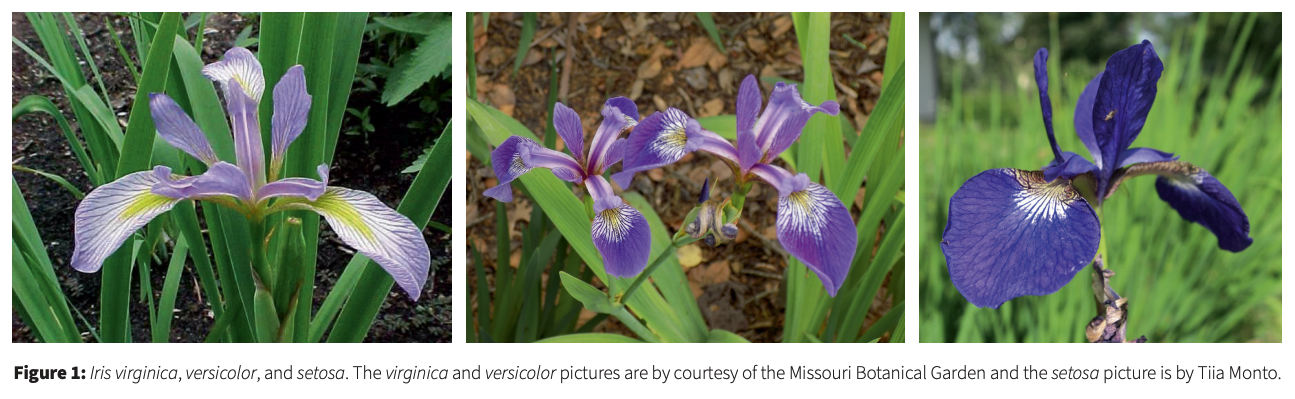


In this notebook we will explore and work on the Iris dataset (that deals with different types of the iris flower).  The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. Further information for which can be found at https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html


Image Source: Unwin, Antony, and Kim Kleinman. "The iris data set: In search of the source of virginica." Significance 18.6 (2021): 26-29.

First we have to import some libraries:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

**Understanding Libraries (15 mins)**

Take a moment to explore the purposes of each library mentioned. Utilize Google or other resources to familiarize yourself with the functionalities they offer. Additionally, distinguish between lines that import entire packages and those that import specific functions.

##Loading and Examining Data (10 min):

1. Utilize the `load_iris` function imported in the previous step to load the dataset. Ensure that you save the dataset into a variable.

2. Create a Pandas DataFrame object that includes the features (retrieved from `iris['data']`) and the target values (located in `iris[target]`). Note that column names should align with the feature names (`iris['feature_names']`), and an additional column is required for the target value.

3. Familiarize yourself with the dataset. Determine the number of distinct iris varieties included. To get an initial overview, use `pd.head()` to display the first 5 records of the dataset. Additionally, employ `column_example.unique()` to identify all unique elements in a specific column of the Pandas DataFrame.

load the data and know how many classes are there (target column)

In [ ]:
#ToDo: Load the dataset
#Insert your own code here

#ToDo: explain the parameters of the initialising function
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#ToDo: Print the different possible target values
print(dataset['target'].unique())
#ToDo: Print the first 5 records of the dataset
dataset.head()

##Data Exploration (15 min):

Understanding relationships between variables is crucial, and a mere table of numbers might not reveal these dependencies effectively. Let's visualize the data using plots to identify correlations among features.

1. **Scatter Plots and Histograms:**
   Familiarize yourself with two types of plots – scatter plots and histograms. These visualizations are essential tools for interpreting relationships between variables. You can explore these plot types in the Matplotlib library.

2. **Plotting Correlations:**
   Given that we have 4 different features, the goal is to plot the correlation between each pair of features. This entails a total of 16 plots. The code below provides the structure, and your task is to fill in the missing parts. Utilize `axs[COLUMN_INDEX, ROW_INDEX]` to select the appropriate subplot for each pair of features.

Your task is to complete the code, ensuring that each subplot reflects the correlation between two features. Explore the resulting plots to uncover relationships within the dataset.

In [ ]:
fig, axs = plt.subplots(len(dataset.columns), len(dataset.columns), figsize=(25, 25))

for i in range(len(dataset.columns)):
    for j in range(len(dataset.columns)):
        if i == j:
            #ToDo: explain why we plot histogram instead of scatter plot when i=j. What are i and j?
            axs[i,j].hist(dataset[dataset.columns[i]])
        else:
            #ToDo: scatter plot the data points with column i as x and column j as y,
            #with the color of the dot defined by target value

            #Insert you own code here

        axs[0,j].set_title(dataset.columns[j])
    axs[i,0].set(ylabel=dataset.columns[i])

plt.show()

**Understanding Feature Correlations:**

To better comprehend the relationships between features and facilitate future predictions, it's crucial to calculate which features are correlated with the target value and how features correlate among themselves. Visualizing this information is efficiently achieved through a correlation matrix.

**Correlation Matrix:**
A correlation matrix is a valuable tool, showcasing correlation coefficients between variables. Each cell in the matrix indicates the correlation between two variables, providing a comprehensive summary of relationships within the dataset. This matrix serves multiple purposes: summarizing data, serving as input for advanced analyses, and functioning as a diagnostic tool.

**Correlation Coefficient:**
In the correlation matrix, the correlation between variables is represented as a numerical value known as the correlation coefficient.

**How to Compute:**
Use `a_pandas_dataframe.corr()` to effortlessly compute the correlation matrix for your dataset.

For additional details on correlation matrices, refer to [What is a Correlation Matrix?](https://www.displayr.com/what-is-a-correlation-matrix/#:~:text=A%20correlation%20matrix%20is%20a,a%20diagnostic%20for%20advanced%20analyses). This resource offers insights into the significance and utility of correlation matrices in data analysis.

In [ ]:
#ToDo explain what the negative and positive values represent
#Optional : change the color scheme (see documentation of the function for help)

correlation_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)
plt.show()
dataset.boxplot(by="target", figsize=(5,5))
plt.show()

##Model Training (15 min):

In the realm of machine learning, assessing the effectiveness of a model typically involves evaluating its performance on a test set—a set of data distinct from the one used during the training phase. This separation enhances the reliability of the evaluation.

To implement this evaluation strategy, we'll randomly divide the dataset into training and test sets, allocating 25% of the data to the test set.

It's worth noting that we've imported the `train_test_split` function from the `sklearn` module, specifically from the `model_selection` submodule. This function facilitates the seamless partitioning of the dataset for training and testing purposes.

In [ ]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values

#ToDo split the dataset into train and test (set random_state=0) - X_train_X_test, y_train_ y_test
#Insert your own code here

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Before we can train the classifier, we need to create and initialise the classifier object (in this case, LogisticRegression object).

You can use the classifier.fit() function to fit the classifier on the training set.

In [ ]:
# Fitting Logistic Regression to the Training set
#Initialising the classifier
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

#ToDo: fit the classifier to the train set
#Insert your own code here

##Classifier Performance Evaluation (15 min):

Once we've successfully fitted the model, it's imperative to assess its performance to determine whether the method's complexity and the amount of training data are adequate.

Here are the key steps in this evaluation process:

1. Utilize the trained model to predict the target values of the test set.
2. Predict the probabilities associated with each target class on the test set using the trained model.
3. Compare these predicted probabilities to the actual results.
4. Construct a confusion matrix to further analyze the model's performance.

To obtain predictions as single numbers, employ `classifier.predict()`. Alternatively, for predictions in the form of probabilities for each target class, use `classifier.predict_proba()`. These steps collectively contribute to a comprehensive evaluation of the classifier's effectiveness.

In [ ]:
# Predicting the results on the test set
y_pred = classifier.predict(X_test)
# Predict probabilities (into probs_y variable)
#Insert your code here
probs_y = np.round(probs_y, 2)


In [ ]:
#We plot a table with target results, predicted class and probabilities for each class for every data point
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

**Understanding Classifier Performance Disparities:**

The reliability of our classifier may not be uniform across all classes; certain classes might be easily predicted while others consistently face misclassification.

To gain insights into these disparities, a confusion matrix becomes instrumental. This matrix provides a visual representation of the distinctiveness between each class.

In this matrix, each row corresponds to the actual class, and each column signifies the predicted class. The number at the intersection of row r and column c indicates how frequently our model predicts a point in class r as belonging to class c. The term "confusion matrix" is aptly chosen because it allows for a clear understanding of how often our classifier confuses any two classes.

To compute the confusion matrix, employ the `confusion_matrix()` function imported from `sklearn.metrics`. For a visual representation in the form of a heatmap, utilize `heatmap()` from the `seaborn` module. This heatmap provides a matrix of values where each cell's color is indicative of its numerical value, aiding in the intuitive interpretation of classifier performance.

In [ ]:
#ToDo:  compute the confusion matrix into variable cm
#Insert your code here

print(cm)
fig, ax = plt.subplots(figsize=(3,2))

#ToDo: visualise the confusion matrix
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.figure(figsize = (5,5))
plt.show()

# Logistic Regression on MNIST (20 min, extra task)


MNIST (https://www.tensorflow.org/datasets/catalog/mnist) is a handwritten digit recognition dataset, where every image represents a number from 0 to 9 written by hand.

It provides an example closer to real life, and presents more of a challenge to classify due to the larger amount of features per data point and the larger number of possible classes.

To download the dataset, we will use data loaders.


In [ ]:
#Load MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
images, labels = mnist['data'], mnist['target']



In [ ]:
#ToDo: split into train and test set

#ToDo split the dataset into train and test (into images_train, images_test, labels_train, labels_test with random_state=0)
#Insert your own code here

# MNIST Data exploration

To better understand the dataset, we can visualise several images from the training data

In [ ]:
#import matplotlib.pyplot as plt

# Plot the images in the batch, along with the true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].reshape(28, 28)), cmap='gray')
    ax.set_title(labels[idx])


After understanding what kind of images the dataset generally has, we should explore one image in more detail.

In [ ]:
img = np.squeeze(images[1].reshape(28, 28))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max() / 2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y, x), horizontalalignment='center', verticalalignment='center',
                    color='white' if img[x][y] < thresh else 'black')


The MNIST dataset presents more of a challenge, let's repeat the training process from the iris dataset on the newly loaded MNIST dataset

In [ ]:
#Fit a model to MNIST

#ToDo: create and initialise the classifier
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
#ToDo: fit the classifier to the train set
classifier.fit(images_train, labels_train)

Let us evaluate the performance of our classifier. We expect the performance to be worse, as the problem is now more complex.
This shows the necessity for more complicated machine learning methods.

In [ ]:
#Evaluate the model on MNIST dataset

# Predicting the Test set results
y_pred = classifier.predict(images_test)
# ToDo: perform probabilistic predict
#Insert own code
### Print results
probs_y = np.round(probs_y, 2)

#We plot a table with target results, predicted class and probabilities for each class for every data point
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(labels_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

In [ ]:
#ToDo:  compute the confusion matrix
cm = confusion_matrix(labels_test, y_pred)
print(cm) #print confusion matrix
fig, ax = plt.subplots(figsize=(3,2))

#ToDo: visualise the confusion matrix
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.figure(figsize = (5,5))
plt.show()